Online Retails Purchase
Introduction:

# Step 1. Import the necessary libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='ticks')

# Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv).

In [2]:
url='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Online_Retail/Online_Retail.csv'

# Step 3. Assign it to a variable called online_rt
Note: if you receive a utf-8 decode error, set encoding = 'latin1' in pd.read_csv().

In [3]:
online_rt = pd.read_csv(url, encoding='latin1')

In [4]:
online_rt.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom


In [5]:
online_rt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
online_rt.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

정답지에서 제시한 정답

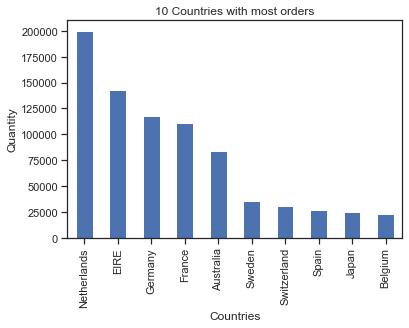

In [32]:
# group by the Country
countries = online_rt.groupby('Country').sum()

# sort the value and get the first 10 after UK
countries = countries.sort_values(by = 'Quantity',ascending = False)[1:11]

# create the plot
countries['Quantity'].plot(kind='bar')

# Set the title and labels
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')

# show the plot
plt.show()

내가 한것들

In [7]:
online_rt.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [8]:
top10_df_Country_Quntity_sum_list = online_rt.groupby('Country').sum().sort_values('Quantity', ascending=False).index[1:11]

In [9]:
online_rt['Country'].isin(top10_df_Country_Quntity_sum_list)

0         False
1         False
2         False
3         False
4         False
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Name: Country, Length: 541909, dtype: bool

In [10]:
df1 = online_rt[online_rt['Country'].isin(top10_df_Country_Quntity_sum_list)]
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


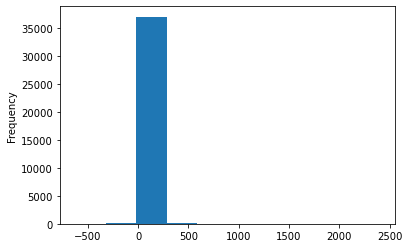

In [11]:
df1.Quantity.plot(kind='hist');

## 최고 주문량 탑 10 바 그래프로 나타내기 영국 제외

In [12]:
df_Country_Quntity_max=online_rt.groupby('Country').Quantity.agg(['max'])

In [13]:
top10_df_Country_Quntity_max = df_Country_Quntity_max.sort_values('max', ascending=False)[1:11]

In [14]:
top10_df_Country_Quntity_max

,max
Country,
Netherlands,2400
Japan,2040
EIRE,1440
Australia,1152
France,912
Sweden,768
Germany,600
Canada,504
Channel Islands,407


판다스로 바로 그리기

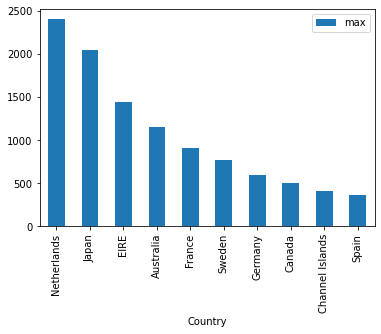

In [15]:
top10_df_Country_Quntity_max.plot(kind='bar');

지정하기

In [16]:
x = top10_df_Country_Quntity_max.index.to_list()
x

['Netherlands',
 'Japan',
 'EIRE',
 'Australia',
 'France',
 'Sweden',
 'Germany',
 'Canada',
 'Channel Islands',
 'Spain']

In [17]:
y = [x[0] for x in top10_df_Country_Quntity_max.values.tolist()]
y

[2400, 2040, 1440, 1152, 912, 768, 600, 504, 407, 360]

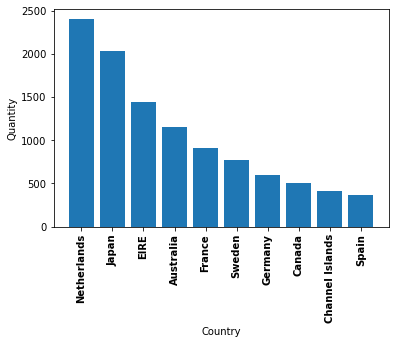

In [18]:
y = [x[0] for x in top10_df_Country_Quntity_max.values.tolist()]
names = top10_df_Country_Quntity_max.index.to_list()
y_pos = np.arange(len(names))

plt.bar(y_pos, y)
plt.xticks(y_pos, names, fontweight='bold', rotation=90)
plt.xlabel('Country')
plt.ylabel('Quantity');

# Step 5. Exclude negative Quatity entries

In [19]:
online_rt['Quantity'].describe()

count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

In [20]:
(online_rt['Quantity'] < 0).sum()

10624

In [21]:
online_rt2 = online_rt[online_rt['Quantity'] >= 0]

# Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

In [22]:
rt2_country=online_rt2.groupby('Country').sum()
rt2_country['Q_per_U'] = rt2_country['Quantity'] / rt2_country['UnitPrice']

In [23]:
top3_list = rt2_country.sort_values('Q_per_U', ascending=False).index[:3].tolist()

In [24]:
top3_list

['Japan', 'Netherlands', 'Australia']

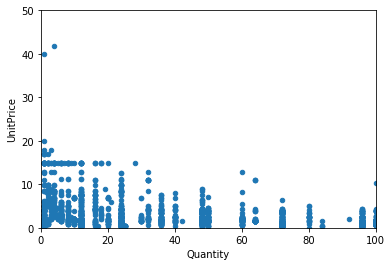

In [25]:
online_rt2[online_rt2['Country'].isin(top3_list)].loc[:,['Quantity','UnitPrice']].plot(kind='scatter', x='Quantity', y='UnitPrice')
plt.xlim(0, 100)
plt.ylim(0, 50);

정답지에서 제시한 정답

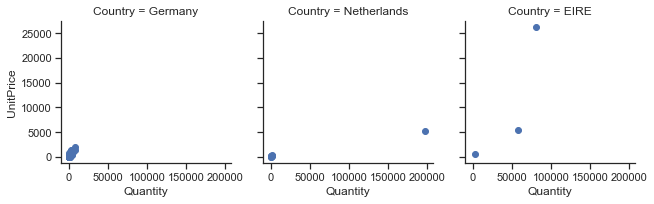

In [34]:
# groupby CustomerID
customers = online_rt2.groupby(['CustomerID','Country']).sum()

# there is an outlier with negative price
customers = customers[customers.UnitPrice > 0]

# get the value of the index and put in the column Country
customers['Country'] = customers.index.get_level_values(1)

# top three countries
top_countries =  ['Netherlands', 'EIRE', 'Germany']

# filter the dataframe to just select ones in the top_countries
customers = customers[customers['Country'].isin(top_countries)]

#################
# Graph Section #
#################

# creates the FaceGrid
g = sns.FacetGrid(customers, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)

# adds legend
g.add_legend()

# Step 7. Investigate why the previous results look so uninformative.
This section might seem a bit tedious to go through. But I've thought of it as some kind of a simulation of problems one might encounter when dealing with data and other people. Besides there is a prize at the end (i.e. Section 8).

(But feel free to jump right ahead into Section 8 if you want; it doesn't require that you finish this section.)

## Step 7.1 Look at the first line of code in Step 6. And try to figure out if it leads to any kind of problem.

### Step 7.1.1 Display the first few rows of that DataFrame.

In [35]:
online_rt.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom


### Step 7.1.2 Think about what that piece of code does and display the dtype of UnitPrice

In [28]:
online_rt.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### Step 7.1.3 Pull data from online_rt for CustomerIDs 12346.0 and 12347.0.¶

In [30]:
online_rt[online_rt.CustomerID.isin([12346.0,12347.0])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,12/7/10 14:57,2.10,12347.0,Iceland
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,12/7/10 14:57,4.25,12347.0,Iceland
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,12/7/10 14:57,3.25,12347.0,Iceland
14941,537626,22492,MINI PAINT SET VINTAGE,36,12/7/10 14:57,0.65,12347.0,Iceland
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,12/7/10 14:57,1.25,12347.0,Iceland
...,...,...,...,...,...,...,...,...
535010,581180,20719,WOODLAND CHARLOTTE BAG,10,12/7/11 15:52,0.85,12347.0,Iceland
535011,581180,21265,PINK GOOSE FEATHER TREE 60CM,12,12/7/11 15:52,1.95,12347.0,Iceland
535012,581180,23271,CHRISTMAS TABLE SILVER CANDLE SPIKE,16,12/7/11 15:52,0.83,12347.0,Iceland
535013,581180,23506,MINI PLAYING CARDS SPACEBOY,20,12/7/11 15:52,0.42,12347.0,Iceland


정답지에서 제시한 정답

In [38]:
display(online_rt2[online_rt2.CustomerID == 12347.0].
        sort_values(by='UnitPrice', ascending = False).head())
display(online_rt2[online_rt2.CustomerID == 12346.0].
        sort_values(by='UnitPrice', ascending = False).head())
#The result is exactly what we'd suspected. Customer 12346.0 placed
#one giant order, whereas 12347.0 placed a lot of smaller orders.
#So we've identified one potential reason why our plots looked so weird at section 6.
#At this stage we need to go back to the initial problem we've specified at section 6.
#And make it more precise.

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
428966,573511,22423,REGENCY CAKESTAND 3 TIER,6,10/31/11 12:25,12.75,12347.0,Iceland
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,8/2/11 8:48,12.75,12347.0,Iceland
72267,542237,22423,REGENCY CAKESTAND 3 TIER,3,1/26/11 14:30,12.75,12347.0,Iceland
148300,549222,22423,REGENCY CAKESTAND 3 TIER,3,4/7/11 10:43,12.75,12347.0,Iceland
428967,573511,23173,REGENCY TEAPOT ROSES,2,10/31/11 12:25,9.95,12347.0,Iceland


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/11 10:01,1.04,12346.0,United Kingdom


## Step 7.2 Reinterpreting the initial problem.
To reiterate the question that we were dealing with:
"Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries"

The question is open to a set of different interpretations. We need to disambiguate.

We could do a single plot by looking at all the data from the top 3 countries. Or we could do one plot per country. To keep things consistent with the rest of the exercise, let's stick to the latter oprion. So that's settled.

But "top 3 countries" with respect to what? Two answers suggest themselves: Total sales volume (i.e. total quantity sold) or total sales (i.e. revenue). This exercise goes for sales volume, so let's stick to that.

### Step 7.2.1 Find out the top 3 countries in terms of sales volume.

In [39]:
sales_volume = online_rt2.groupby('Country').Quantity.sum().sort_values(ascending=False)

top3 = sales_volume.index[1:4] #We are excluding UK
top3

Index(['Netherlands', 'EIRE', 'Germany'], dtype='object', name='Country')

### Step 7.2.2
Now that we have the top 3 countries, we can focus on the rest of the problem:
"Quantity per UnitPrice by CustomerID".
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:
One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total Quantity for each customer. The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

## Step 7.3 Modify, select and plot data

### Step 7.3.1 Add a column to online_rt called Revenue calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

In [40]:

online_rt2['Revenue'] = online_rt2.Quantity * online_rt2.UnitPrice
online_rt2.head()

<ipython-input-40-09b279d4e60a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  online_rt2['Revenue'] = online_rt2.Quantity * online_rt2.UnitPrice


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


### Step 7.3.2 Group by CustomerID and Country and find out the average price (AvgPrice) each customer spends per unit.

In [41]:
grouped = online_rt2[online_rt2.Country.isin(top3)].groupby(['CustomerID','Country'])

plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# get the value of the index and put in the column Country
plottable['Country'] = plottable.index.get_level_values(1)
plottable.head()

<ipython-input-41-c842c6ae43fa>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


,,Quantity,Revenue,AvgPrice,Country
CustomerID,Country,,,,
12426.0,Germany,258,582.73,2.258643,Germany
12427.0,Germany,533,825.80,1.549343,Germany
12468.0,Germany,366,729.54,1.993279,Germany
12471.0,Germany,8212,19824.05,2.414034,Germany
12472.0,Germany,4148,6572.11,1.584405,Germany


### Step 7.3.3 Plot

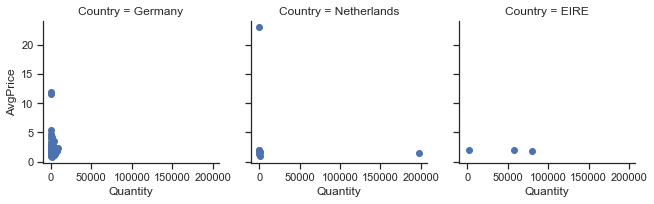

In [42]:

####################
# Graph Section v 2#
####################

# creates the FaceGrid
g = sns.FacetGrid(plottable, col="Country")

# map over a make a scatterplot
g.map(plt.scatter, "Quantity", "AvgPrice", alpha=1)

# adds legend
g.add_legend();

### Step 7.2.2
Now that we have the top 3 countries, we can focus on the rest of the problem:
"Quantity per UnitPrice by CustomerID".
We need to unpack that.

"by CustomerID" part is easy. That means we're going to be plotting one dot per CustomerID's on our plot. In other words, we're going to be grouping by CustomerID.

"Quantity per UnitPrice" is trickier. Here's what we know:
One axis will represent a Quantity assigned to a given customer. This is easy; we can just plot the total Quantity for each customer. The other axis will represent a UnitPrice assigned to a given customer. Remember a single customer can have any number of orders with different prices, so summing up prices isn't quite helpful. Besides it's not quite clear what we mean when we say "unit price per customer"; it sounds like price of the customer! A reasonable alternative is that we assign each customer the average amount each has paid per item. So let's settle that question in that manner.

## Step 7.3 Modify, select and plot data

### Step 7.3.1 Add a column to online_rt called Revenue calculate the revenue (Quantity * UnitPrice) from each sale.
We will use this later to figure out an average price per customer.

### Step 7.3.2 Group by CustomerID and Country and find out the average price (AvgPrice) each customer spends per unit.

### Step 7.3.3 Plot

## Step 7.4 What to do now?
We aren't much better-off than what we started with. The data are still extremely scattered around and don't seem quite informative.

But we shouldn't despair! There are two things to realize: 1) The data seem to be skewed towaards the axes (e.g. we don't have any values where Quantity = 50000 and AvgPrice = 5). So that might suggest a trend. 2) We have more data! We've only been looking at the data from 3 different countries and they are plotted on different graphs.

So: we should plot the data regardless of Country and hopefully see a less scattered graph.

### Step 7.4.1 Plot the data for each CustomerID on a single graph

<ipython-input-45-6adfe3e56491>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  plottable = grouped['Quantity','Revenue'].agg('sum')


[]

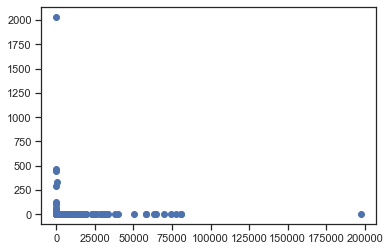

In [45]:
grouped = online_rt2.groupby(['CustomerID'])
plottable = grouped['Quantity','Revenue'].agg('sum')
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)
plt.plot()


#Turns out the graph is still extremely skewed towards the axes like an exponential decay function.

### Step 7.4.2 Zoom in so we can see that curve more clearly¶

[]

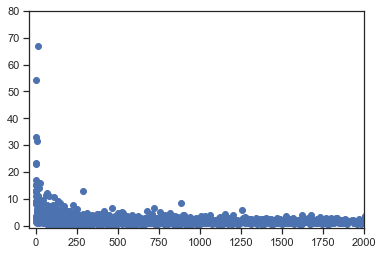

In [47]:
grouped = online_rt2.groupby(['CustomerID','Country'])
plottable = grouped.agg({'Quantity': 'sum',
                         'Revenue': 'sum'})
plottable['AvgPrice'] = plottable.Revenue / plottable.Quantity

# map over a make a scatterplot
plt.scatter(plottable.Quantity, plottable.AvgPrice)

#Zooming in. (I'm starting the axes from a negative value so that
#the dots can be plotted in the graph completely.)
plt.xlim(-40,2000) 
plt.ylim(-1,80)

plt.plot()


#And there is still that pattern, this time in close-up!

# Step 8. Plot a line chart showing revenue (y) per UnitPrice (x).
Did Step 7 give us any insights about the data? Sure! As average price increases, the quantity ordered decreses. But that's hardly surprising. It would be surprising if that wasn't the case!

Nevertheless the rate of drop in quantity is so drastic, it makes me wonder how our revenue changes with respect to item price. It would not be that surprising if it didn't change that much. But it would be interesting to know whether most of our revenue comes from expensive or inexpensive items, and how that relation looks like.

That is what we are going to do now.

## Step 8.1 Group UnitPrice by intervals of 1 for prices [0,50), and sum Quantity and Revenue.

In [48]:
#These are the values for the graph.
#They are used both in selecting data from
#the DataFrame and plotting the data so I've assigned
#them to variables to increase consistency and make things easier
#when playing with the variables.
price_start = 0 
price_end = 50
price_interval = 1

#Creating the buckets to collect the data accordingly
buckets = np.arange(price_start,price_end,price_interval)

#Select the data and sum
revenue_per_price = online_rt2.groupby(pd.cut(online_rt2.UnitPrice, buckets)).Revenue.sum()
revenue_per_price.head()

UnitPrice
(0, 1]    1.107775e+06
(1, 2]    2.691765e+06
(2, 3]    2.024143e+06
(3, 4]    8.651018e+05
(4, 5]    1.219377e+06
Name: Revenue, dtype: float64

## Step 8.3 Plot.

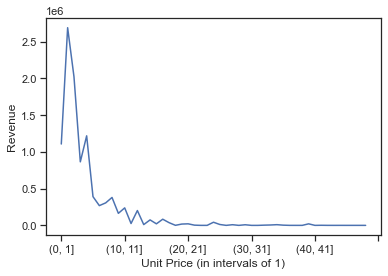

In [49]:
revenue_per_price.plot()
plt.xlabel('Unit Price (in intervals of '+str(price_interval)+')')
plt.ylabel('Revenue')
plt.show()

## Step 8.4 Make it look nicer.
x-axis needs values.
y-axis isn't that easy to read; show in terms of millions.

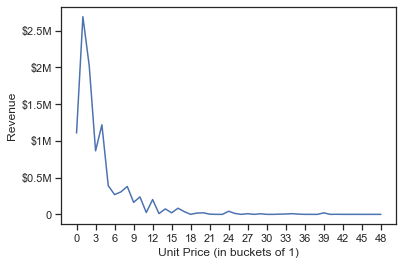

In [50]:
revenue_per_price.plot()

#Place labels
plt.xlabel('Unit Price (in buckets of '+str(price_interval)+')') 
plt.ylabel('Revenue')

#Even though the data is bucketed in intervals of 1,
#I'll plot ticks a little bit further apart from each other to avoid cluttering.
plt.xticks(np.arange(price_start,price_end,3),
           np.arange(price_start,price_end,3))
plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000],
           ['0', '$0.5M', '$1M', '$1.5M', '$2M', '$2.5M'])
plt.show()

#Looks like a major chunk of our revenue comes from items worth $0-$3!